## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [47]:
import pandas as pd


### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [48]:
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv", sep=",")
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [49]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [50]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [51]:
data.isnull().values.any()

False

Количественнные:
duration
amount
age

Категориальные:
status
purpose
personal_status_sex
other_installment_plans
property

Порядковые:
credit_history
savings
employment_duration
installment_rate
other_debtors
number_credits
job
people_liable
housing
present_residence

Бинарные:
telephone
foreign_worker
credit_risk


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [52]:
data.groupby(data["purpose"])["amount"].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [53]:
print("Renting < 30:", "{:.2f}".format(data[(data["housing"] == "rent") & (data["age"]  < 30)]["status"].count()/data[(data["age"]  < 30)]["status"].count()*100), "%")
print("Renting > 40:", "{:.2f}".format(data[(data["housing"] == "rent") & (data["age"]  > 40)]["status"].count()/data[(data["age"]  > 40)]["status"].count()*100), "%")


Renting < 30: 66.67 %
Renting > 40: 68.01 %


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [54]:
print("F. workers w >3 credits:", data[(data["foreign_worker"] == "yes") & ((data["number_credits"] == "4-5") | ((data["number_credits"] == ">= 6")))]["status"].count())


F. workers w >3 credits: 1


### Задание 6 (1 балл)

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

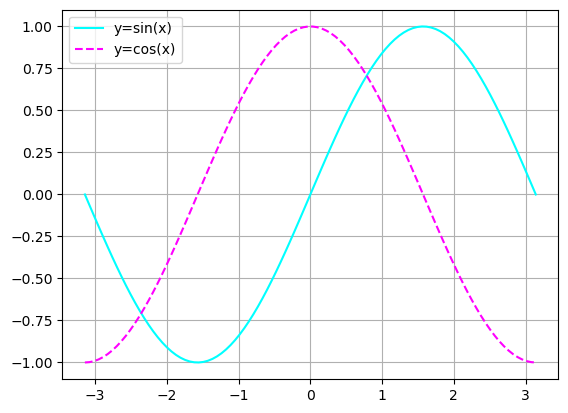

In [56]:
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, np.sin(x), label="y=sin(x)", color="cyan")
plt.plot(x, np.cos(x), label="y=cos(x)", color="magenta", linestyle="--")
plt.legend()
plt.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

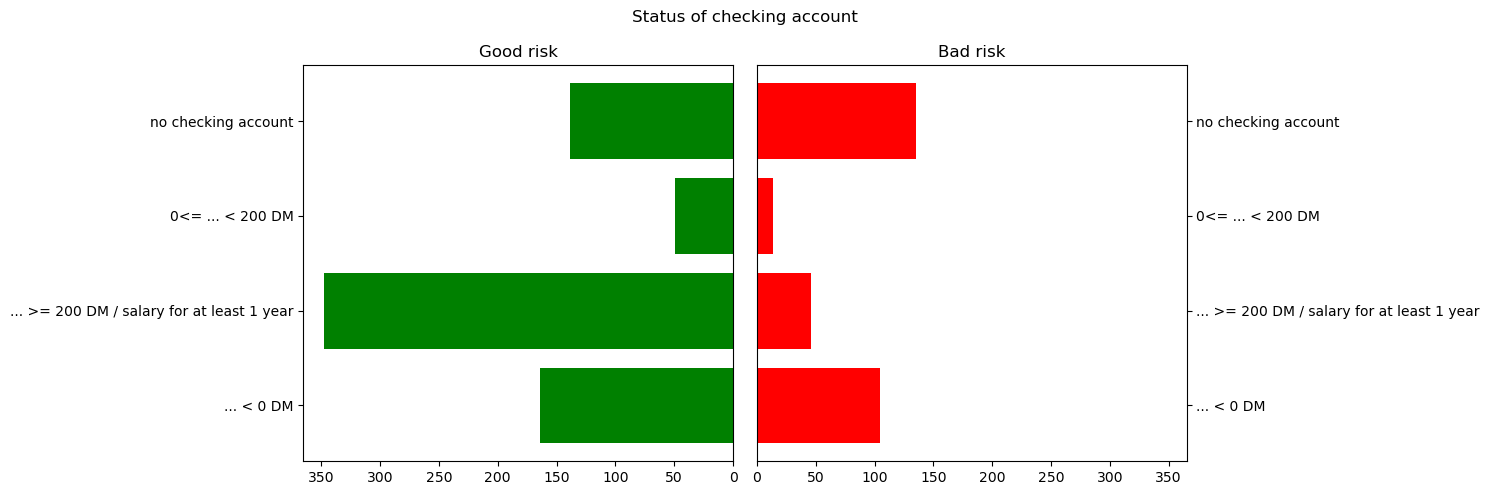

In [57]:
y = sorted(data["status"].unique())
x1 = data[(data["credit_risk"] == "good")].groupby("status")["status"].count()
x2 = data[(data["credit_risk"] == "bad")].groupby("status")["status"].count()

fig, graphs = plt.subplots(figsize=(15, 5), ncols=2)


graphs[0].barh(y, x1, align='center', color='green')
graphs[0].set_title("Good risk")
graphs[1].barh(y, x2, align='center', color='red')
graphs[1].set_title("Bad risk")
graphs[1].yaxis.tick_right()


xlim = max(graphs[0].get_xlim(), graphs[1].get_xlim())
graphs[0].set_xlim(xlim)
graphs[1].set_xlim(xlim)


graphs[0].invert_xaxis()


fig.suptitle("Status of checking account")
fig.tight_layout()

plt.show()

### Задание 8  (0.5 балла)

In [58]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

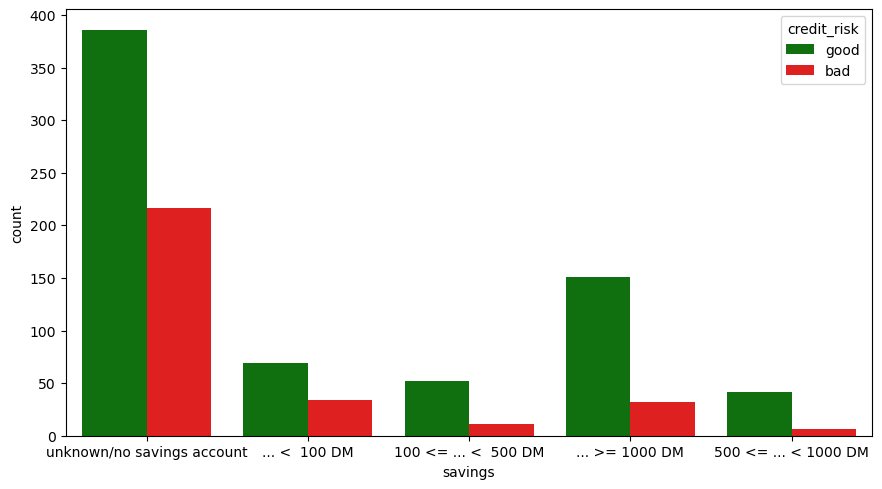

In [59]:
plt.figure(figsize=(9, 5))
sns.countplot(x="savings", hue="credit_risk", data=data, palette=["green", "red"])
plt.tight_layout()
plt.show()

#seaborn нравится больше...

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

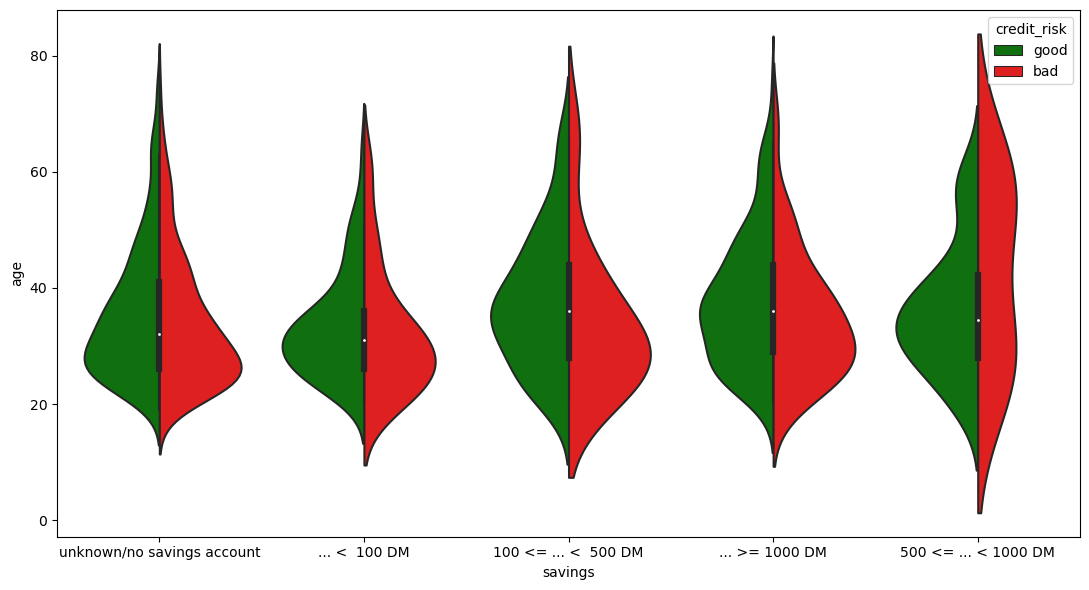

In [60]:
plt.figure(figsize=(11, 6))
sns.violinplot(x="savings",y="age", hue="credit_risk", data=data, palette=["green", "red"], split=True)
plt.tight_layout()
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

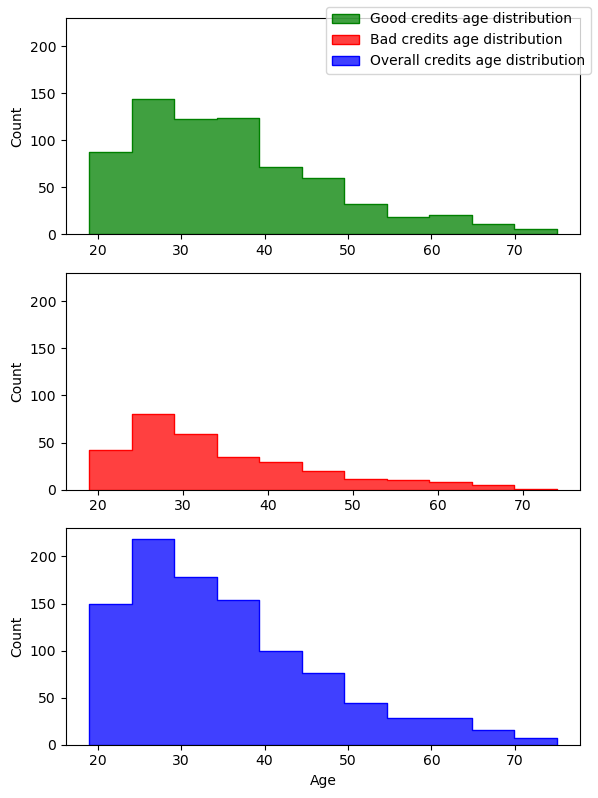

In [61]:
fig, graphs = plt.subplots(figsize=(6, 8), nrows=3, sharey=True)
sns.histplot(ax=graphs[0], x="age", data=data[(data["credit_risk"] == "good")], color="green", bins=11, element="step", label="Good credits age distribution")
sns.histplot(ax=graphs[1], x="age", data=data[(data["credit_risk"] == "bad")], color="red", bins=11, element="step", label="Bad credits age distribution")
sns.histplot(ax=graphs[2], x="age", data=data, color="blue", bins=11, element="step", label="Overall credits age distribution")

graphs[0].set(xlabel=None)
graphs[1].set(xlabel=None)
graphs[2].set(xlabel="Age")
fig.tight_layout()
fig.legend()
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

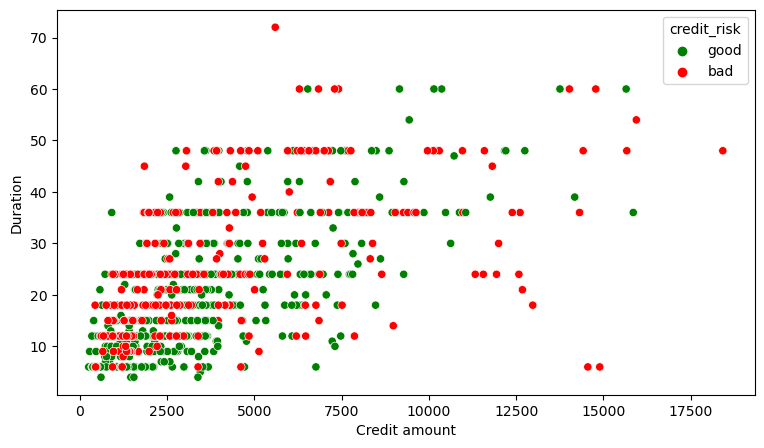

In [62]:
plt.figure(figsize=(9, 5))
graph = plt.axes()
sns.scatterplot(ax=graph, x=data["amount"], y=data["duration"], hue=data["credit_risk"], palette=["green", "red"])
graph.set_xlabel("Credit amount")
graph.set_ylabel("Duration")
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

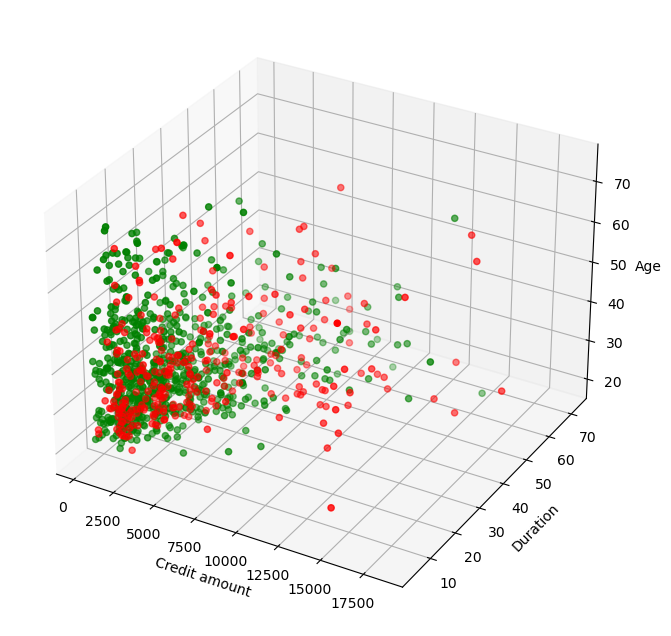

In [63]:
plt.figure(figsize=(8, 8))
graph = plt.axes(projection="3d")
graph.scatter(data[(data["credit_risk"]=="good")]["amount"], data[(data["credit_risk"]=="good")]["duration"], data[(data["credit_risk"]=="good")]["age"], color="green")
graph.scatter(data[(data["credit_risk"]=="bad")]["amount"], data[(data["credit_risk"]=="bad")]["duration"], data[(data["credit_risk"]=="bad")]["age"], color="red")
graph.set_xlabel("Credit amount")
graph.set_ylabel("Duration")
graph.set_zlabel("Age")
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [64]:

data = pd.get_dummies(data=data, columns=["status", "purpose", "personal_status_sex", "property", "other_installment_plans"])


universal_mapper = {
    "employment_duration": {"1 <= ... < 4 yrs": 2, "4 <= ... < 7 yrs": 3, "< 1 yr": 1, ">= 7 yrs": 4, "unemployed": 0},
    "credit_history": {"all credits at this bank paid back duly": 3, "critical account/other credits elsewhere": 0, "delay in paying off in the past": 1, "existing credits paid back duly till now": 2, "no credits taken/all credits paid back duly": 4},
    "savings": {"... <  100 DM": 1, "... >= 1000 DM": 2,"100 <= ... <  500 DM": 3,"500 <= ... < 1000 DM": 4,"unknown/no savings account": 0},
    "installment_rate": {"20 <= ... < 25": 1, "25 <= ... < 35": 2, "< 20": 0, ">= 35": 3},
    "other_debtors":{"co-applicant":1, "guarantor":2, "none":0},
    "present_residence":{"1 <= ... < 4 yrs":1, "4 <= ... < 7 yrs":2, "< 1 yr":0, ">= 7 yrs":3},
    "housing": {"for free":0, "own":1, "rent":2},
    "number_credits": {"1":0, "2-3":1, "4-5":2, ">= 6":3},
    "job":{"manager/self-empl./highly qualif. employee":3,"skilled employee/official":2,"unemployed/unskilled - non-resident":0,"unskilled - resident":1},
    "people_liable": {"0 to 2":0, "3 or more":1},
    "telephone":{"no":0, "yes (under customer name)":1},
    "foreign_worker":{"no":0, "yes":1},
    "credit_risk":{"bad":0,"good":1}
}

data = data.replace(universal_mapper)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [65]:
def predict(Xtest: np.array) -> np.array:

    Xtest = Xtest.astype('float64') 
    Xtest[:, 0] = Xtest[:, 0]/12.0 
    Xtest[:, 2] = Xtest[:, 2]/1000 
    Xtest[:, 8] = Xtest[:, 8]/10 
    W = np.zeros(Xtest.shape[1])
    W[0] = -5 
    W[2] = -0.7 
    W[3] = 10 
    W[4] = 5 
    W[8] = 1 
    W[9] = 3 
    W[10] = -0.2 
    W[11] = 1 
    return(np.where(Xtest@W > 0, 1, 0))

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print(accuracy_score(y_test, predict(X_test)))

0.724


C:\Users\swebe\AppData\Local\Temp\ipykernel_7548\441846998.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values
